<a href="https://colab.research.google.com/github/SerbC/04-ELECTRONICA-M-A1-S2-Tehnici-de-analiz-i-clasificare-automat-a-informa-iei-2020-/blob/main/ImageSegmentation%26more.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opencv-python ipyplot

In [2]:
import cv2 #used to load the images (in the future it will have other uses)
import numpy as np
import glob #used to read image names
import random #used to generate tran/test split
import ipyplot #it will be explained
from matplotlib import pyplot as plt #for all ur plotting needs


        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `base_64` param to `True`.
        


In [3]:
base_path = "/content/drive/My Drive/fac/Laborator/Images/" #this is janky af
files_list = []
for i in range(4):
  files_list.append(glob.glob(base_path+str(i)+"/*.jpg"))
  print(glob.glob(base_path+str(i)+"/*.jpg")) #this is just so you can see output (delete)

['/content/drive/My Drive/fac/Laborator/Images/0/0.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/1.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/2.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/3.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/4.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/5.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/6.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/7.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/8.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/9.jpg']
['/content/drive/My Drive/fac/Laborator/Images/1/0.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/1.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/2.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/3.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/4.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/5.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/6.jpg', '/content/drive/My Drive/fac/Laborator/Images/

In [4]:
random.seed(42)#if we all use the same data, we will all have the same train/test split (the answer to life the universe and everything)
indexes = random.sample(range(0, 9), 7) #7 reprezents the number of train files
print(indexes)

[1, 0, 5, 2, 8, 4, 7]


In [5]:
train_files =  []
test_files = []
for L in files_list:
  t =[]
  for i in indexes:
    t.append(L[i])
  train_files.append(t)
  test_files.append([x for x in L if x not in t])

print(train_files)
print(test_files)

[['/content/drive/My Drive/fac/Laborator/Images/0/1.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/0.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/5.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/2.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/8.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/4.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/7.jpg'], ['/content/drive/My Drive/fac/Laborator/Images/1/1.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/0.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/5.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/2.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/8.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/4.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/7.jpg'], ['/content/drive/My Drive/fac/Laborator/Images/2/1.jpg', '/content/drive/My Drive/fac/Laborator/Images/2/0.jpg', '/content/drive/My Drive/fac/Laborator/Images/2/5.jpg', '/content/drive/My Drive/fac/Laborator/Ima


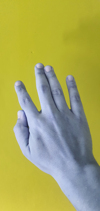
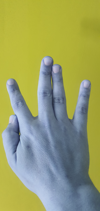
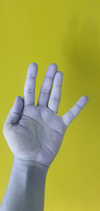
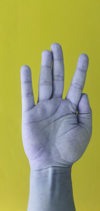
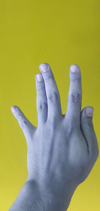
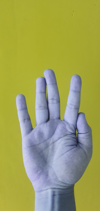
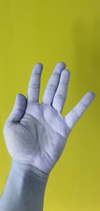


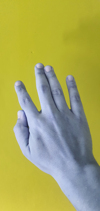
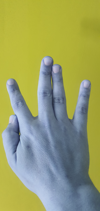
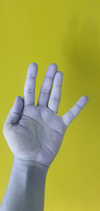
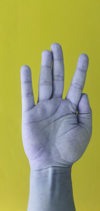
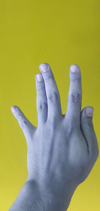
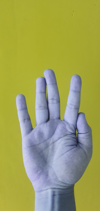
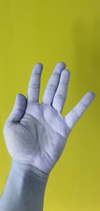


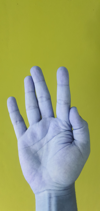
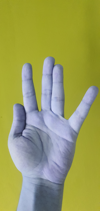
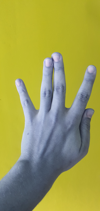


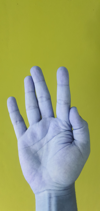
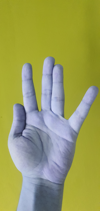
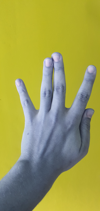

In [6]:
train_images = []
for L in train_files:
  s = []
  for l in L:
    s.append( cv2.imread(l) )
    #cv2.imshow('image',img)#DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions to crash; see https://github.com/jupyter/notebook/issues/3935.
  train_images.append(s)
test_images = []
for L in test_files:
  s = []
  for l in L:
    s.append( cv2.imread(l) )
  test_images.append(s)

ipyplot.plot_images(train_images[0], max_images=27, img_width=100)    
ipyplot.plot_images(test_images[0], max_images=12, img_width=100)    

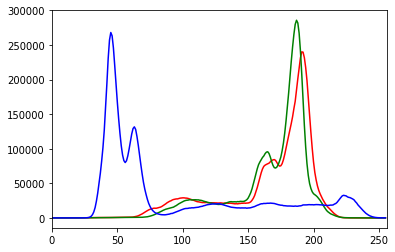

In [7]:
color = ('r','g','b')
img = train_images[0][0]
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()
#red and green = yellow

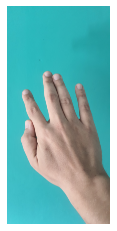

In [8]:
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [9]:
np.shape(img)

(4032, 1908, 3)

Train shape: (4, 7, 806, 381, 3)
Test shape: (4, 3, 806, 381, 3)


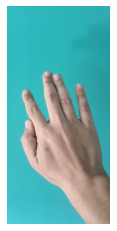

In [10]:
scale_percent = 20 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

train_images_resized = []
for S in train_images:
  s = []
  for im in S:
    s.append(cv2.resize(im, dim, interpolation = cv2.INTER_AREA))
  train_images_resized.append(s)

test_images_resized = []
for S in test_images:
  s = []
  for im in S:
    s.append(cv2.resize(im, dim, interpolation = cv2.INTER_AREA))
  test_images_resized.append(s)

import pickle
file = open('/content/drive/My Drive/fac/Laborator/Images/dump_train_images_resized', 'wb')
pickle.dump(train_images_resized, file)
file.close()
file = open('/content/drive/My Drive/fac/Laborator/Images/dump_test_images_resized', 'wb')
pickle.dump(test_images_resized, file)
file.close()

print("Train shape:",np.shape(train_images_resized))
print("Test shape:",np.shape(test_images_resized))
plt.axis("off")
plt.imshow(cv2.cvtColor(train_images_resized[0][0], cv2.COLOR_BGR2RGB))

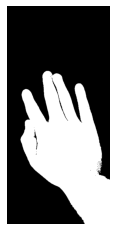

In [11]:
img = train_images_resized[0][0][:,:,2]
ret,th1 = cv2.threshold(img,90,255,cv2.THRESH_BINARY) 
plt.axis("off")
plt.imshow(th1,cmap='gray')

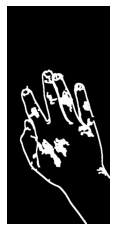

In [12]:
image_gray = cv2.cvtColor(train_images_resized[0][0], cv2.COLOR_BGR2GRAY)
filtered_image = cv2.Canny(image_gray, threshold1=10, threshold2=180)
kernel = np.ones((5,5),np.uint8)
filtered_image = cv2.dilate(filtered_image,kernel,iterations = 1)
plt.axis("off")
plt.imshow(filtered_image,cmap='gray')

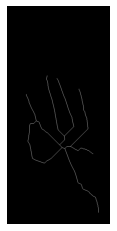

In [13]:
from skimage.morphology import skeletonize, thin
th1[th1>0] =1
erosion = cv2.erode(th1,kernel,iterations = 5)
skeleton = skeletonize(erosion,method='lee')
plt.axis("off")
plt.imshow(skeleton,cmap='gray')


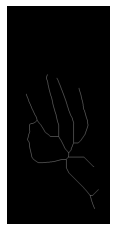

In [14]:
thinned = thin(erosion)
plt.axis("off")
plt.imshow(thinned,cmap='gray')